In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append('../src/')
from diffusion_maps_tools import *
# initialize the library
DiffMaps = diffusion_maps_tools()
plt.style.use('seaborn-white')

In [2]:
# Load matlab arrays
mat = loadmat('Q_ins.mat')
Q_ins = mat['Q_ins']
print('Shape of input paramere space is ({},{})'.format(Q_ins.shape[0], Q_ins.shape[1]))

mat = loadmat('Q_outs.mat')
Q_outs = mat['Q_outs']
print('Shape of observation space is ({},{})'.format(Q_outs.shape[0], Q_outs.shape[1]))

mat = loadmat('dim_ana_par.mat')
pi_real = mat['delta_da']

mat = loadmat('active_par.mat')
pi_ac_sub = mat['delta']

mat = loadmat('pi_outs.mat')
pi_outs = mat['pi_outs']


Shape of input paramere space is (161051,5)
Shape of observation space is (161051,1)


In [3]:
# num_eigenpairs = 30
# epsilon = 1e-2
# # pairwise distance with hnswlib tree with 500 nearest neighbors
# distance = DiffMaps.distance(points = Q_outs,
#                               method = 'hnswtree',
#                               hnswtree_options={'n_neighbors':1000})
# kernel = DiffMaps.kernel(metric = distance, epsilon=epsilon*2)
# del distance
# kernel = DiffMaps.ker_normalize(kernel, alpha=1.0)
# eigval, phi = DiffMaps.eigensolver(matrix = kernel,
#                                    num_eigenpairs = num_eigenpairs)
# del kernel
# print('    Eigenvalues are = {}'.format(eigval.real))

In [4]:
# plt.figure()
# ax = plt.subplot(121)
# p=ax.scatter(phi[:,1],
#              phi[:,2], 
#              c= Q_outs[:,0],
#              s= 1,
#              cmap= plt.get_cmap('Spectral'))
# ax.set_xlabel(r'$\phi_1$')
# ax.set_ylabel(r'$\phi_3$')
# cbar = plt.colorbar(p)
# cbar.set_label(r'$Q_{out}$')

In [5]:
num_eigenpairs = 10
epsilon = 1e-1
step = 8
distance = DiffMaps.distance(points = pi_outs[0:-1:step,:],
                             method = 'kdtree')
kernel = DiffMaps.kernel(metric = distance, epsilon=epsilon*2)
del distance
kernel = DiffMaps.ker_normalize(kernel, alpha=1.0)
eigval, phi = DiffMaps.eigensolver(matrix = kernel,
                                   num_eigenpairs = num_eigenpairs)
del kernel
print('    Eigenvalues are = {}'.format(eigval.real))

  > Dataset: 20132 points in 1 dimensions
  > Compute distances with kdtree
  --> distances greater than INF are neglected
  --> Distance matrix is 100.0000% dense.
  > Compute Kernel
  > Compute Normalized Kernel with alpha=1.000000
  > Compute First 10 Eigenvectors
    Eigenvalues are = [ 1.00000000e+00  3.91292887e-04  1.27793807e-07  3.10505114e-11
  3.49156403e-18  3.49156403e-18  1.12026664e-17  1.12026664e-17
 -8.38285792e-18 -8.38285792e-18]


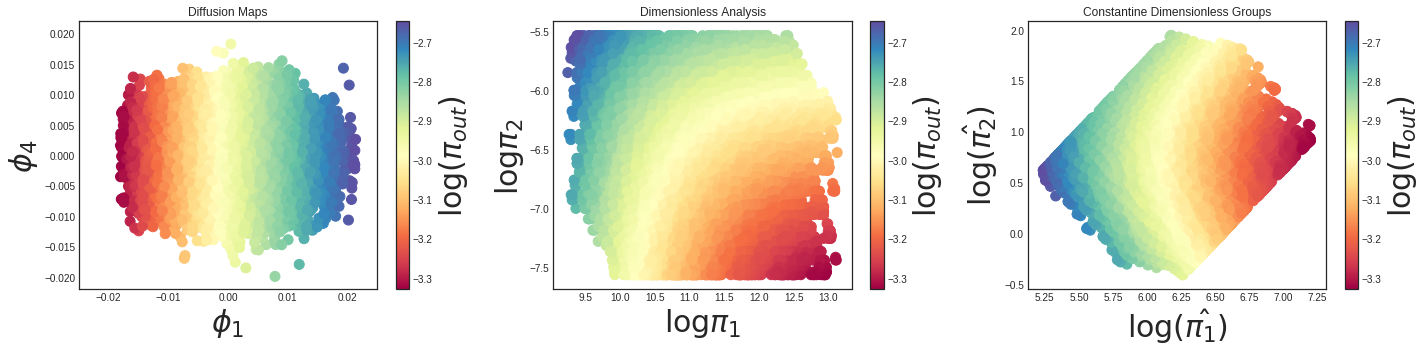

In [6]:
fs = 30
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

p1= ax1.scatter(phi[:,1],
              phi[:,4], 
              c= np.log(pi_outs[0:-1:step,0]),
              s= 100,
              cmap= plt.get_cmap('Spectral'), rasterized=True)
ax1.set_xlabel(r'$\phi_1$', fontsize=fs)
ax1.set_ylabel(r'$\phi_4$', fontsize=fs)
ax1.set_xlim([-0.025,0.025])
ax1.set_ylim([-0.022,0.022])
ax1.title.set_text('Diffusion Maps')
cbar1 = fig.colorbar(p1, ax=ax1)
cbar1.set_label(r'$\log(\pi_{out})$', fontsize=fs)


p2= ax2.scatter(pi_real[0:-1:step,0],
              pi_real[0:-1:step,1], 
              c= np.log(pi_outs[0:-1:step,0]),
              s= 100,
              cmap= plt.get_cmap('Spectral'), rasterized=True)
ax2.set_xlabel(r'$\log\pi_1$', fontsize=fs)
ax2.set_ylabel(r'$\log\pi_2$', fontsize=fs)
ax2.title.set_text('Dimensionless Analysis')
cbar2 = fig.colorbar(p2, ax=ax2)
cbar2.set_label(r'$\log(\pi_{out})$', fontsize=fs)



p3= ax3.scatter(pi_ac_sub[0:-1:step,0],
              pi_ac_sub[0:-1:step,1], 
              c= np.log(pi_outs[0:-1:step,0]),
              s= 100,
              cmap= plt.get_cmap('Spectral'), rasterized=True)
ax3.set_xlabel(r'$\log(\hat{\pi_1})$', fontsize=fs)
ax3.set_ylabel(r'$\log(\hat{\pi_2})$', fontsize=fs)
cbar3 = fig.colorbar(p3, ax=ax3)
cbar3.set_label(r'$\log(\pi_{out})$', fontsize=fs)
ax3.title.set_text('Constantine Dimensionless Groups')

plt.tight_layout()
plt.savefig('dimensional_analysis.pdf')

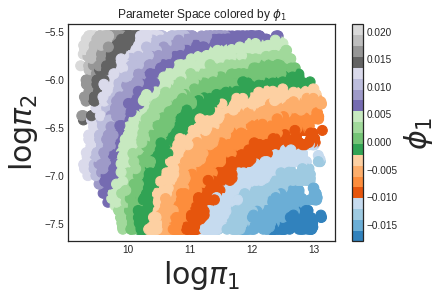

In [10]:
fig, ax1 = plt.subplots(1,1)
p1= ax1.scatter(pi_real[0:-1:step,0],
              pi_real[0:-1:step,1], 
              c= phi[:,1],
              s= 100,
              cmap= plt.get_cmap('tab20c'), rasterized=True)
ax1.set_xlabel(r'$\log\pi_1$', fontsize=fs)
ax1.set_ylabel(r'$\log\pi_2$', fontsize=fs)
ax1.title.set_text('Parameter Space colored by $\phi_1$')
cbar1 = fig.colorbar(p1, ax=ax1)
cbar1.set_label(r'$\phi_1$', fontsize=fs)
plt.savefig('parameter_space.pdf')